<a href="https://colab.research.google.com/github/Ridhi655/Determing-Car-worth/blob/main/_How_Much_is_Your_Car_Worth%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

Importing the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

Reading the dataset

In [2]:
data = pd.read_csv('car_data.csv')

In [3]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
data.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [5]:
data.shape

(804, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [7]:
data = data.drop_duplicates()

In [8]:
data.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

PART 1

In [9]:
dataset_for_part1=data[['Mileage','Price']]



In [10]:

#linreg = linear_model.LinearRegression()
#linreg.fit(x, y)

#print('intercept:', linreg.intercept_)
#print('coefficients:', linreg.coef_)
#print('r-squared:', linreg.score(x, y))

#intercept: [24764.55900606]
#coefficients: [[-0.1725205]]
#r-squared: 0.02046344732348926

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


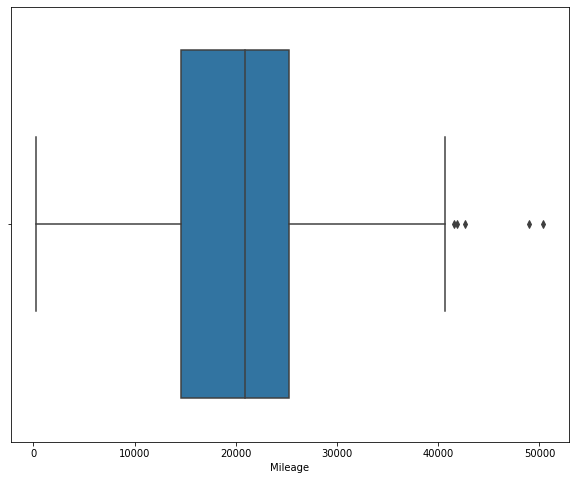

In [11]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(dataset_for_part1.Mileage)

OUTLIERS IN MILEAGE

In [12]:

percentile25=dataset_for_part1.Mileage.quantile(0.25)
percentile75=dataset_for_part1.Mileage.quantile(0.75)
iqr=percentile75-percentile25
upper_limit=round(percentile75+1.5*iqr)
lower_limit=round(percentile25-1.5*iqr)
print(f"upper limit is {upper_limit} \n lower limit is {lower_limit}")

upper limit is 41097 
 lower limit is -1261


In [13]:
print("Number of outliers in mileage : ",dataset_for_part1[dataset_for_part1.Mileage>=upper_limit].shape[0])

Number of outliers in mileage :  5


In [14]:
data_without_outliers = dataset_for_part1.loc[(dataset_for_part1['Mileage'] > lower_limit) & (dataset_for_part1['Mileage'] < upper_limit)]
data_without_outliers

,Mileage,Price
0,8221,17314.103129
1,9135,17542.036083
2,13196,16218.847862
3,16342,16336.913140
4,19832,16339.170324
...,...,...
799,16229,16507.070267
800,19095,16175.957604
801,20484,15731.132897
802,25979,15118.893228


In [15]:
data_without_outliers.describe()

,Mileage,Price
count,799.000000,799.000000
mean,19673.856070,21287.275019
std,7967.875493,9842.539866
min,266.000000,8638.930895
25%,14596.000000,14261.330129
50%,20870.000000,18004.870415
75%,25158.000000,26495.534994
max,40719.000000,70755.466717


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


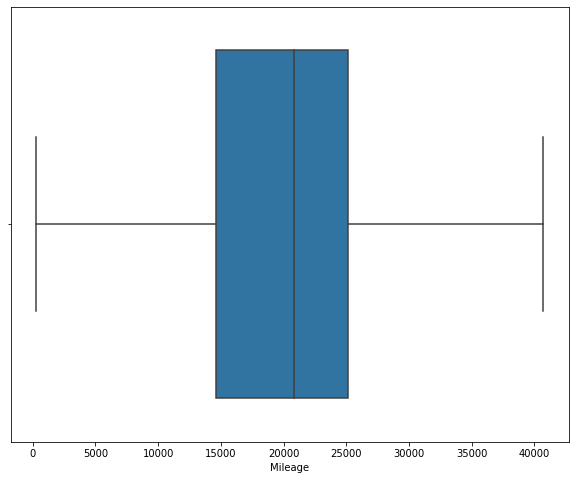

In [16]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(data_without_outliers.Mileage)

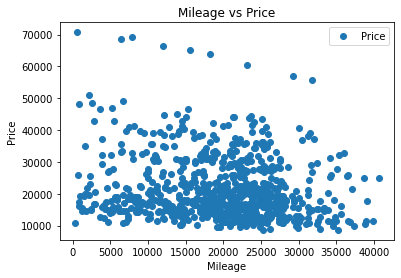

In [17]:
data_without_outliers.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [18]:
data_without_outliers.corr()

,Mileage,Price
Mileage,1.000000,-0.165933
Price,-0.165933,1.000000


In [19]:
#data_without_outliers['transformed'] = np.exp(data_without_outliers['Mileage'])
#data_without_outliers.plot(x='transformed', y='Price', style='o')
#plt.title('mileage vs Price')
#plt.xlabel('Mileage')
#plt.ylabel('Price')
#plt.show()
#data_without_outliers[['Mileage','Price']].corr()

In [20]:
x=data_without_outliers[['Mileage']].values
y=data_without_outliers['Price'].values

In [21]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 30)

In [22]:
X_train.shape, X_test.shape

((639, 1), (160, 1))

In [23]:
y_train.shape, y_test.shape

((639,), (160,))

In [24]:
#from sklearn.preprocessing import StandardScaler ## standrard scaling 
#scaler = StandardScaler() #initialise to a variable
#scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
#X_train_scaled= scaler.transform(X_train) # fit (mean, sd) and then transform the training data
#X_test_scaled = scaler.transform(X_test) # transform the test data 

In [25]:
#scaler.var_

In [26]:
#Modelling

In [27]:
linreg = LinearRegression()
#linreg.fit(X_train_scaled,y_train)
linreg.fit(X_train,y_train)

print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)
print('r-squared:', linreg.score(x, y))

intercept: 25560.767313927863
coefficients: [-0.21109352]
r-squared: 0.02735926386971299


In [28]:
#PREDICTED LINEAR REGRESSION EQUATION:
#price=-0.19*mileage + 25175

In [29]:
y_pred = linreg.predict(X_test) # given the features of the test dataset, it will give the final predictions

y_pred

array([23667.8917245 , 24578.76026118, 24603.03601592, 20831.21700935,
       19844.9880862 , 21461.5422586 , 24022.52883727, 20019.1402398 ,
       24649.26549669, 22168.91664247, 19999.50854248, 19812.4796842 ,
       21719.92072648, 23493.10629034, 20488.8233207 , 23726.99790996,
       20374.62172665, 21089.59547722, 19214.66283695, 21879.08524018,
       21547.035134  , 22581.18228607, 25378.17141955, 20952.80687658,
       23764.99474347, 20249.02108254, 19858.07588441, 19746.40741259,
       21876.97430499, 19864.19759648, 20531.25311812, 23446.87680957,
       22554.37340909, 20543.70763578, 25248.34890506, 21046.32130572,
       21083.8959522 , 22833.43904188, 21830.11154366, 20280.47401695,
       21236.72766032, 20111.1770143 , 19840.97730933, 20782.24331282,
       21444.44368352, 21259.94794747, 24465.4030412 , 22049.64880395,
       21982.52106474, 21528.88109132, 21063.63097432, 18924.83143467,
       21045.26583813, 18944.25203846, 20744.87975987, 19760.76177192,
      

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,39713.667922,23667.891724
1,15053.933735,24578.760261
2,21903.322618,24603.036016
3,11539.845650,20831.217009
4,19689.740844,19844.988086
...,...,...
155,23077.565910,20537.163737
156,10897.076506,24146.651827
157,11080.516378,17780.915652
158,12741.190233,18211.546432


In [31]:
linreg.predict([[8220]])

array([23825.57858357])

In [32]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.01932680455941127


Text(0.5, 1.0, 'Mileage vs Price')

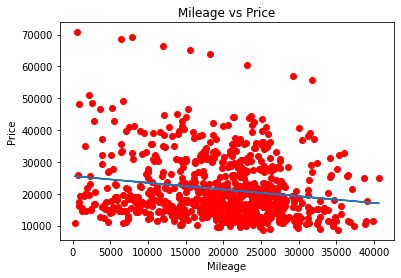

In [33]:
plt.scatter(x, y, color='r')
plt.plot(x, linreg.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

Part 2

In [34]:

features = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
dataset_for_part2=data[features]
X = dataset_for_part2[features]
y = data.Price
#x = data[feature].values
#y = data[['Price']].values
dataset_for_part2



,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [35]:
dataset_for_part2.describe()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [36]:
for i in X:
  percentile25=dataset_for_part2[i].quantile(0.25)
  percentile75=dataset_for_part2[i].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=round(percentile75+1.5*iqr)
  lower_limit=round(percentile25-1.5*iqr)
  print(f"{i} \n upper limit is {upper_limit} \n lower limit is {lower_limit}")

Mileage 
 upper limit is 41097 
 lower limit is -1261
Cylinder 
 upper limit is 9 
 lower limit is 1
Liter 
 upper limit is 6 
 lower limit is 0
Doors 
 upper limit is 4 
 lower limit is 4
Cruise 
 upper limit is 1 
 lower limit is 1
Sound 
 upper limit is 2 
 lower limit is -2
Leather 
 upper limit is 2 
 lower limit is -2


In [37]:
#for i in X:
#  dataset2_without_outliers = dataset_for_part2.loc[(dataset_for_part2[i] > lower_limit) & (dataset_for_part2[i] < upper_limit)]
#dataset2_without_outliers


In [38]:
#linreg = linear_model.LinearRegression()
#linreg.fit(x, y)
#print('intercept:', linreg.intercept_)
#print('coefficients:', linreg.coef_)

R-squared

In [39]:
#print('r-squared: ', linreg.score(x, y))

In [40]:
X = dataset_for_part2[features].values
y = data.Price.values

In [41]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 30)

from sklearn.preprocessing import StandardScaler ## standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)



LinearRegression()

In [42]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],columns=['Coefficients'])
y_pred = regressor.predict(X_test_scaled)
coeff_df


,Coefficients
Mileage,-1661.044065
Cylinder,5220.545797
Liter,-946.726507
Doors,-1185.252532
Cruise,2816.539386
Sound,-918.341751
Leather,1685.916881


In [43]:
regressor.intercept_ # c 

21451.07890200264

In [44]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,10813.343521,25184.625951
1,31181.715159,32309.408796
2,12209.559623,13636.692269
3,16143.957292,23718.519746
4,26060.335350,23144.302034
...,...,...
156,43892.467880,31952.166644
157,10386.040218,10363.695370
158,23077.565910,25998.350865
159,15194.975354,15582.447578


In [45]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.45249864349981517


Combinaton of Factors

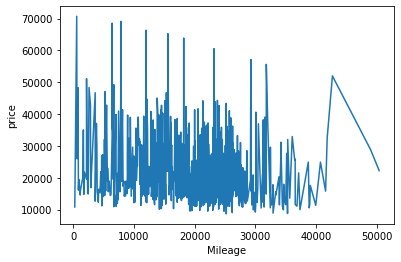

          Mileage     Price
Mileage  1.000000 -0.143051
Price   -0.143051  1.000000


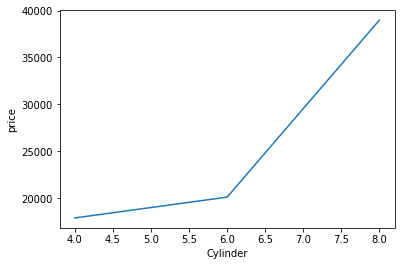

          Cylinder     Price
Cylinder  1.000000  0.569086
Price     0.569086  1.000000


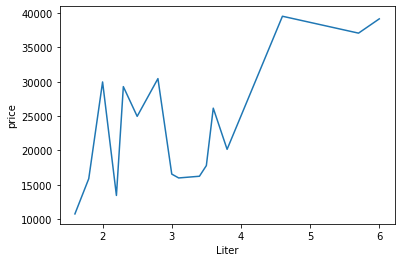

          Liter     Price
Liter  1.000000  0.558146
Price  0.558146  1.000000


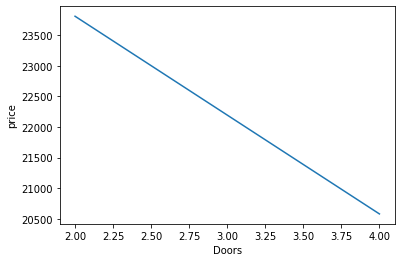

         Doors    Price
Doors  1.00000 -0.13875
Price -0.13875  1.00000


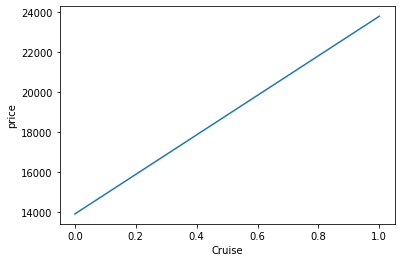

          Cruise     Price
Cruise  1.000000  0.430851
Price   0.430851  1.000000


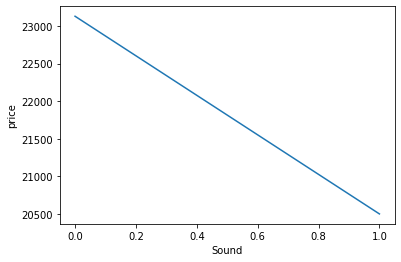

          Sound     Price
Sound  1.000000 -0.124348
Price -0.124348  1.000000


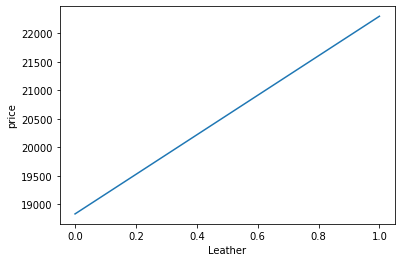

          Leather     Price
Leather  1.000000  0.157197
Price    0.157197  1.000000


In [46]:
#for i in ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']:
def plotting_with_one_feature():
    for i in ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'):
      data.groupby(data[i])['Price'].mean().plot()
      #plt.title(i,' vs Price')
      plt.xlabel(i)
      plt.ylabel('price')
      plt.show()
      print(data[[i,'Price']].corr())

plotting_with_one_feature()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


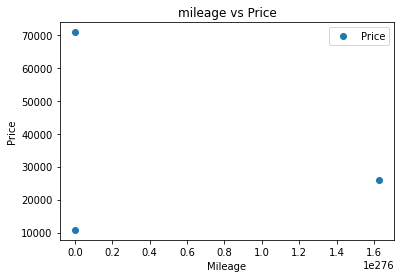

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [47]:
data['transformed'] = np.exp(data['Mileage'])
data.plot(x='transformed', y='Price', style='o')
plt.title('mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()
data[['Mileage','Price']].corr()

1) There is no linear relationship between Mileage and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature
2)There is a linear relationship between cylinder and price =>so we can go ahead and develop a linear regression model. No transformation required.
3)There is a linear relationship between liter and price =>so we can go ahead and develop a linear regression model. No transformation required.
4)There is no linear relationship between doors and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature
5)There is a linear relationship between cruise and price =>so we can go ahead and develop a linear regression model. No transformation required.
6)There is no linear relationship between Mileage and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature
7)There is no linear relationship between sound and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature
There is no linear relationship between leather and Price ; Have tried all transformations - still not able to see a good linear relationship ; Have decided to drop the feature

In [48]:
# from sklearn.feature_selection import RFE
# estimator = LinearRegression()
# selector = RFE(estimator, n_features_to_select=3, step=1)
# selector = selector.fit(X_train_scaled, y_train)
# list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],selector.support_))

In [49]:
feature = ['Cylinder', 'Liter', 'Cruise']
X = data[feature].values
y = data[['Price']].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
from sklearn.preprocessing import StandardScaler ## standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [51]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [52]:
#coeff_df = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Cruise'],columns=['Coefficients'])
y_pred = regressor.predict(X_test_scaled)
#coeff_df
y_pred

array([[25245.55808947],
       [12193.06426724],
       [25245.55808947],
       [12193.06426724],
       [25245.55808947],
       [19125.93603779],
       [12642.23532681],
       [18088.10078913],
       [18387.54816218],
       [31354.94958413],
       [31354.94958413],
       [12642.23532681],
       [18537.27184871],
       [12342.78795376],
       [18761.8573785 ],
       [12342.78795376],
       [18387.54816218],
       [25245.55808947],
       [25245.55808947],
       [18387.54816218],
       [18537.27184871],
       [12642.23532681],
       [18088.10078913],
       [18387.54816218],
       [25245.55808947],
       [12642.23532681],
       [31354.94958413],
       [18537.27184871],
       [18612.13369197],
       [12642.23532681],
       [24721.52518663],
       [12642.23532681],
       [31354.94958413],
       [18387.54816218],
       [31354.94958413],
       [18537.27184871],
       [12642.23532681],
       [18387.54816218],
       [12642.23532681],
       [18612.13369197],


In [53]:
regressor.intercept_ # c 

array([21200.46634127])

In [54]:
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

In [55]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.37717592282489576


In [56]:
# !pip install scikit-learn==0.24.2

In [57]:
# from sklearn.feature_selection import SequentialFeatureSelector
# estimator = LinearRegression()
# sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
# sfs.fit(X_train_scaled, y_train)
# print(list(zip(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],sfs.get_support())))

In [58]:
# X_trans = sfs.transform(X)
# X_trans # feature selection

In [59]:
# from sklearn.model_selection import cross_validate
# regressor = LinearRegression(normalize = True) #untrained model

In [60]:
# cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
# cv_results['test_score'].mean()


In [61]:
# import warnings
# warnings.filterwarnings('ignore')

# from sklearn.linear_model import Lasso, Ridge
# for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
#   regressor = Ridge(normalize=True,alpha = alpha)
#   cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
#   print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())


Task-Hard Mode

In [62]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,transformed
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,inf
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,inf
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,inf
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,inf
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,inf


In [63]:
data.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [64]:
data.Model.unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [65]:
data.Type.unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)